<a href="https://colab.research.google.com/github/Zukui/CHE358_python/blob/master/03a_quadratic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# linear regression applied to quadratic model through transformation

In [0]:
import numpy as np
import matplotlib.pyplot as plt 


## data

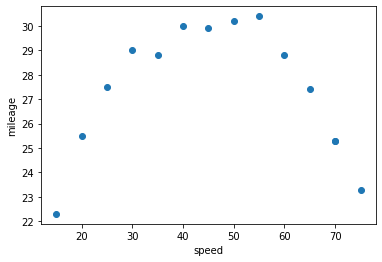

In [2]:
data=np.array([[15 , 22.3 ],
               [20 , 25.5 ],
               [25 , 27.5 ],
               [30 , 29.0 ],
               [35 , 28.8 ],
               [40 , 30.0 ],
               [45 , 29.9 ],
               [50 , 30.2 ],
               [55 , 30.4 ],
               [60 , 28.8 ],
               [65 , 27.4 ],
               [70 , 25.3 ],
               [70 , 25.3 ],
               [75 , 23.3]])
n = len(data[:,0])
x = data[:,0]
y = data[:,1]

plt.scatter(x,y) 
plt.xlabel('speed')
plt.ylabel('mileage')
plt.show()

In [3]:
Y = y
k = 2
p = 3
X = np.concatenate((np.ones((n,1)), x.reshape(n,1)),axis=1)
X = np.concatenate((X, (x.reshape(n,1))**2),axis=1)
print(X)

[[1.000e+00 1.500e+01 2.250e+02]
 [1.000e+00 2.000e+01 4.000e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.000e+01 9.000e+02]
 [1.000e+00 3.500e+01 1.225e+03]
 [1.000e+00 4.000e+01 1.600e+03]
 [1.000e+00 4.500e+01 2.025e+03]
 [1.000e+00 5.000e+01 2.500e+03]
 [1.000e+00 5.500e+01 3.025e+03]
 [1.000e+00 6.000e+01 3.600e+03]
 [1.000e+00 6.500e+01 4.225e+03]
 [1.000e+00 7.000e+01 4.900e+03]
 [1.000e+00 7.000e+01 4.900e+03]
 [1.000e+00 7.500e+01 5.625e+03]]


## least square estimation

In [4]:
C = np.linalg.inv(X.T@X)
hat_theta = C@X.T@Y
print(hat_theta)

[ 1.34348686e+01  7.48552310e-01 -8.23731441e-03]


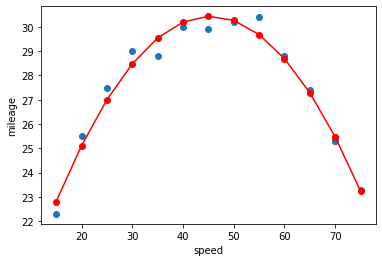

In [5]:
hat_Y = X@hat_theta
plt.scatter(x,y) 
plt.plot(x,hat_Y,'ro-') 
plt.xlabel('speed')
plt.ylabel('mileage')
plt.show()

## significance test

In [6]:
bar_y = sum(Y)/n
e = Y-hat_Y;

SST = sum((Y-bar_y)**2)
SSR = sum((hat_Y-bar_y)**2)
SSE = e.T@e;

MSE = SSE/(n-p);
MSR = SSR/k;
alpha = 0.05;

from scipy.stats import f as f_dist
f = f_dist.ppf(1-alpha,k, n-p)
F0 = MSR/MSE    # ANOVA
p_value = 1 - f_dist.cdf(F0, k, n-p)
print(F0)
print(f)
print(p_value)



203.17465259538616
3.9822979570944836
2.064959092606955e-09


## confidence interval of parameters

In [7]:
from scipy.stats import t as t_dist
t = t_dist.ppf(1-alpha/2,n-p)
CI_theta_low = hat_theta-t*np.sqrt(MSE*np.diag(C))  # confidence intervals on parameters
CI_theta_high = hat_theta+t*np.sqrt(MSE*np.diag(C))
print(CI_theta_low)
print(CI_theta_high)

[ 1.17301507e+01  6.65212434e-01 -9.13695637e-03]
[ 1.51395864e+01  8.31892186e-01 -7.33767245e-03]


## R2

In [8]:
R2 = SSR/SST   # R square
R_adj2 = 1-SSE/(n-p)/(SST/(n-1))  # R adjusted square

print(R2)
print(R_adj2)

0.9736431812316729
0.9688510323647056


## residual analysis

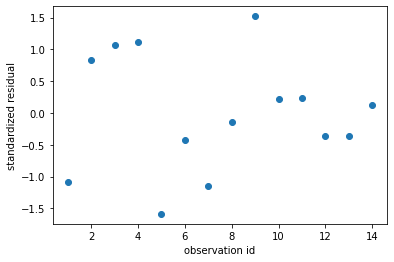

In [9]:
std_e = e/np.sqrt(MSE)

plt.scatter(np.arange(1, n+1, 1), std_e) 
plt.xlabel('observation id')
plt.ylabel('standardized residual')
plt.show()

In [10]:
print(std_e)

[-1.0881559   0.8304039   1.06656964  1.11459917 -1.58709242 -0.42107742
 -1.15092189 -0.14771389  1.52121956  0.22696648  0.23883506 -0.36436337
 -0.36436337  0.12509445]


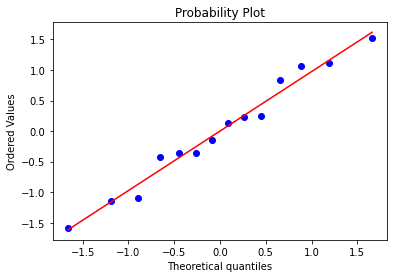

In [11]:
import scipy.stats as stats
import pylab 
stats.probplot(std_e, dist="norm", plot=pylab)
pylab.show()